<a href="https://colab.research.google.com/github/Ranjan234/Python-for-DataScience/blob/main/Handling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Values
* Missing Values occurs in dataset when some of the information is not stored for a variable. There are 3 mechanisms.

* Why Do Missing Values Occur?

- Missing values occur when some information is not recorded for a variable. For example, if a survey form is given to a sample of people, some individuals might not feel comfortable filling certain fields and leave them empty. This results in missing data.

# * Missing Completely at Random (MCAR)
- Missing Completely at Random (MCAR) is a type of missing data mechanism where the probability of a value being missing is unrelated to both observed and missing data. In other words, missingness occurs randomly without any systematic reason.
For example, in a survey about the presence of a certain disease, some participants might have missing answers simply due to errors or accidental omissions, not related to any specific factor.

If data is MCAR, missing values are randomly distributed throughout the dataset without any systematic pattern.

# Missing at Random (MAR)
* Missing at Random (MAR) occurs when the probability of a value being missing depends only on the observed data. This means missingness is systematically related to other observed variables.

For example, in a survey, men might be less comfortable disclosing their salary, while women might be less comfortable disclosing their age. Thus, missing values in income or age fields depend on gender, an observed variable.

In MAR, missing values are related to other observed data, indicating a pattern in missingness.

# Missing Not at Random (MNAR)

* Missing Not at Random (MNAR) is a mechanism where the probability of missingness depends on the value of the missing data itself or unmeasured factors associated with it.

For example, if employees who are less satisfied with their jobs are more likely to withhold their income information, the missingness depends on job satisfaction, which may not be fully observed.

MNAR indicates that missingness is related to the missing values themselves or other unmeasured factors, making it more challenging to handle.

In [1]:
import seaborn as sns

In [6]:
import pandas as pd
df = pd.read_csv('/content/titanic_data.csv')

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
## Check missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,176
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [11]:
## Delete the rows or data point to handel missing values
df.shape

(889, 15)

In [12]:
df.dropna().shape

(182, 15)

In [14]:
# Column wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,0,0,13.0000,Second,man,True,no,True
885,1,1,female,0,0,30.0000,First,woman,False,yes,True
886,0,3,female,1,2,23.4500,Third,woman,False,no,False
887,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation missing values
1. Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

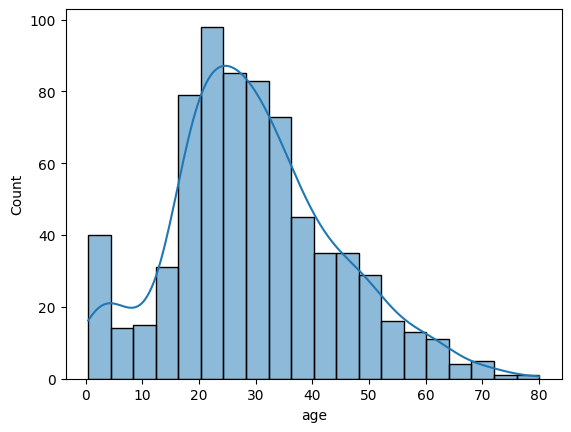

In [18]:
sns.histplot(df['age'], kde=True)

In [24]:
df['Age_mean']= df['age'].fillna(df['age'].mean())

In [25]:
df[['Age_mean', 'age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
884,27.000000,27.0
885,19.000000,19.0
886,29.698696,NaN
887,26.000000,26.0


In [ ]:
## Mean Imputation works will when we have noramally distributed data.

## Median Value Imputation
- If we have outliers in the dataset.

In [26]:
df['age_median']= df['age'].fillna(df['age'].median())

In [29]:
df[['age_median','Age_mean', 'age']]

,age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
884,27.0,27.000000,27.0
885,19.0,19.000000,19.0
886,28.0,29.698696,NaN
887,26.0,26.000000,26.0


## Mode IMputation Technique
- Categorical Values

In [31]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age median,Age_median,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0,38.0
827,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0,62.0


In [32]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
mode_value= df[df['embarked'].notna()]['embarked'].mode()[0]

In [37]:
df['embarked_mode'] =df['embarked'].fillna(mode_value)

In [38]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
884,S,S
885,S,S
886,S,S
887,C,C


In [39]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [40]:
df['embarked'].isnull().sum()

np.int64(2)